# NLTK for Python Test Bed
## Chapter 2:  Text Corpora and Lexical Resources
### Using examples from http://www.nltk.org
##### Whitney King  (1/7/2018)

In [1]:
import nltk
import pandas as pd
#nltk.download()

## _Project Gutenberg Corpora_

Thousands of full texts of established literature, though it is important to consider these texts lack the informality of many conversations

**Corpora** are large bodies of linguistic data (singular term is **corpus**)

In [2]:
#Import sample text used in NLTK corpora examples from Project Gutenberg Files
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
#Define custom functions

def line():
    print("------------------------------------------------------------------")

In [4]:
emma = gutenberg.words('austen-emma.txt')
emma_text = nltk.Text(emma)
print('Total Words: ', len(emma))
line()
emma_text.concordance('surprize')

Total Words:  192427
------------------------------------------------------------------
Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present .

A function can be used to display descriptive statistics about each of the corpora
* The ```raw()``` function returns the contents of the file without any linguistic processing

In [5]:
print("c w  sent   file")
for fid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fid))
    num_words = len(gutenberg.words(fid))
    num_sents = len(gutenberg.sents(fid))
    num_vocab = len(set(w.lower() for w in gutenberg.raw(fid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fid)line()

SyntaxError: invalid syntax (<ipython-input-5-52e776031df0>, line 7)

In [ ]:
bible_sents = gutenberg.sents('bible-kjv.txt')
print(bible_sents)
line()
print(bible_sents[1000])

## _Web and Chat Text Corpora_

In [6]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [7]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

## _Brown Corpus_

Million-word electronic corpus of English, created at Brown University in 1961, using text from 500 different sources categorized by genre

In [8]:
from nltk.corpus import brown
print(brown.categories())
line()
print(brown.sents(categories=['news', 'editorial', 'reviews']))
line()
print(brown.words(categories='news'))
line()
print(brown.words(fileids=['cg22']))

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
------------------------------------------------------------------
[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]
------------------------------------------------------------------
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
--------------

This is a great resource for linguistic inqueries known as **stylistics**; or the systematic differences between genres

In [9]:
humor_text = brown.words(categories='humor')
fdBrownHumor = FreqDist(w.lower() for w in humor_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdBrownHumor[m], end=' ') # end=' ' ensures that the output is all on a single line

NameError: name 'FreqDist' is not defined

#### _Conditional Frequency Distributions_

Conditional Frequency Distributions will word obtain counts for each genre of interest

In [10]:
cfd = nltk.ConditionalFreqDist(
          (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


## _Reuters Corpus_

10,788 news documents totaling 1.3 million words, classified into 90 different topics, which have been divided into two sets, *training*, and *test*
* These can be used to to run against classifiers for with machine learning algorithms

In [11]:
from nltk.corpus import reuters
print(list(reuters.fileids()[:24]), '...')
line()
print(reuters.categories())
line()
print(reuters.categories(['training/9861', 'training/9841']))
line()
print(reuters.fileids(['income', 'carcass']))
line()
print(reuters.words('training/9865')[:14])
line()
print(reuters.words(categories=['barley', 'corn']))

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873'] ...
------------------------------------------------------------------
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkerne

## _Inaugural Address Corpus_

Collection of texts featuring the 55 different presidential addresses across a time dimension

In [12]:
from nltk.corpus import inaugural
print(inaugural.fileids())
line()
address_years = [fileid[:4] for fileid in inaugural.fileids()] # Extracts year from flat file name
print(list(address_years))

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

This lends itself well to visualizing the frequency of usage of a particular word over time

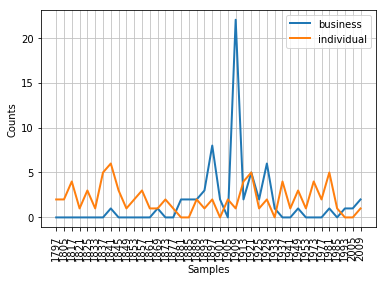

In [13]:
cfd_inaug = nltk.ConditionalFreqDist(
                (target, fileid[:4])
                 for fileid in inaugural.fileids()
                 for w in inaugural.words(fileid)
                 for target in ['business', 'individual']
                 if w.lower().startswith(target))
cfd_inaug.plot()

## _Annotated Text Corpora_

Many text corpora contain linguistic annotations, representing POS tags, named entities, syntactic structures, semantic roles, and so forth
* Much of which are freely available directly through NLTK, including the below:

|Corpus | Compiler | Contents |
|-----|-----|-----|
|Brown Corpus | Francis, Kucera | 15 genres, 1.15M words, tagged, categorized |
|CESS Treebanks | CLiC-UB | 1M words, tagged and parsed (Catalan, Spanish) |
|Chat-80 Data Files | Pereira & Warren | World Geographic Database |
|CMU Pronouncing Dictionary | CMU | 127k entries |
|CoNLL 2000 Chunking Data | CoNLL | 270k words, tagged and chunked |
|CoNLL 2002 Named Entity | CoNLL | 700k words, pos- and named-entity-tagged (Dutch, Spanish) |
|CoNLL 2007 Dependency Treebanks (sel) | CoNLL | 150k words, dependency parsed (Basque, Catalan) |
|Dependency Treebank | Narad | Dependency parsed version of Penn Treebank sample |
|FrameNet | Fillmore, Baker et al | 10k word senses, 170k manually annotated sentences |
|Floresta Treebank | Diana Santos et al | 9k sentences, tagged and parsed (Portuguese) |
|Gazetteer Lists | Various | Lists of cities and countries |
|Genesis Corpus | Misc web sources | 6 texts, 200k words, 6 languages |
|Gutenberg (selections) | Hart, Newby, et al | 18 texts, 2M words |
|Inaugural Address Corpus | CSpan | US Presidential Inaugural Addresses (1789-present) |
|Indian POS-Tagged Corpus | Kumaran et al | 60k words, tagged (Bangla, Hindi, Marathi, Telugu) |
|MacMorpho Corpus | NILC, USP, Brazil | 1M words, tagged (Brazilian Portuguese) |
|Movie Reviews | Pang, Lee | 2k movie reviews with sentiment polarity classification |
|Names Corpus | Kantrowitz, Ross | 8k male and female names |
|NIST 1999 Info Extr (selections) | Garofolo | 63k words, newswire and named-entity SGML markup |
|Nombank | Meyers | 115k propositions, 1400 noun frames |
|NPS Chat Corpus | Forsyth, Martell | 10k IM chat posts, POS-tagged and dialogue-act tagged |
|Open Multilingual WordNet | Bond et al | 15 languages, aligned to English WordNet |
|PP Attachment Corpus | Ratnaparkhi | 28k prepositional phrases, tagged as noun or verb modifiers |
|Proposition Bank | Palmer | 113k propositions, 3300 verb frames |
|Question Classification | Li, Roth | 6k questions, categorized |
|Reuters Corpus | Reuters | 1.3M words, 10k news documents, categorized |
|Roget's Thesaurus | Project Gutenberg | 200k words, formatted text |
|RTE Textual Entailment | Dagan et al | 8k sentence pairs, categorized |
|SEMCOR | Rus, Mihalcea | 880k words, part-of-speech and sense tagged |
|Senseval 2 Corpus | Pedersen | 600k words, part-of-speech and sense tagged |
|SentiWordNet | Esuli, Sebastiani | sentiment scores for 145k WordNet synonym sets |
|Shakespeare texts (selections) | Bosak | 8 books in XML format |
|State of the Union Corpus | CSPAN | 485k words, formatted text |
|Stopwords Corpus | Porter et al | 2,400 stopwords for 11 languages |
|Swadesh Corpus | Wiktionary | comparative wordlists in 24 languages |
|Switchboard Corpus (selections) | LDC | 36 phonecalls, transcribed, parsed |
|Univ Decl of Human Rights | United Nations | 480k words, 300+ languages |
|Penn Treebank (selections) | LDC | 40k words, tagged and parsed |
|TIMIT Corpus (selections) | NIST/LDC | audio files and transcripts for 16 speakers |
|VerbNet 2.1 | Palmer et al | 5k verbs, hierarchically organized, linked to WordNet |
|Wordlist Corpus | OpenOffice.org et al | 960k words and 20k affixes for 8 languages |
|WordNet 3.0 (English) | Miller, Fellbaum | 145k synonym sets |


## _Corpora in Other Languages_

NLTK comes with corpora for many languages, though in some cases they must be manipulated with Python before use
* Unfortunately many languages don't have a lot of substantial corpora at this time

In [14]:
print(nltk.corpus.cess_esp.words())
line()
print(nltk.corpus.floresta.words())
line()
print(nltk.corpus.indian.words('hindi.pos'))
line()
print(nltk.corpus.udhr.fileids()[:24], '...')
line()
print(nltk.corpus.udhr.words('Javanese-Latin1')[11:])

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]
------------------------------------------------------------------
['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]
------------------------------------------------------------------
['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]
------------------------------------------------------------------
['Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1', 'Adja-UTF8', 'Afaan_Oromo_Oromiffa-Latin1', 'Afrikaans-Latin1', 'Aguaruna-Latin1', 'Akuapem_Twi-UTF8', 'Albanian_Shqip-Latin1', 'Amahuaca', 'Amahuaca-Latin1', 'Amarakaeri-Latin1', 'Amuesha-Yanesha-UTF8', 'Arabela-Latin1', 'Arabic_Alarabia-Arabic', 'Asante-UTF8', 'Ashaninca-Latin1', 'Asheninca-Latin1', 'Asturian_Bable-Latin1', 'Aymara-Latin1', 'Balinese-Latin1', 'Bambara-UTF8', 'Baoule-UTF8'] ...
------------------------------------------------------------------
['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]


```udhr``` contains the Universal Declaration of Human Rights in over 300 languages

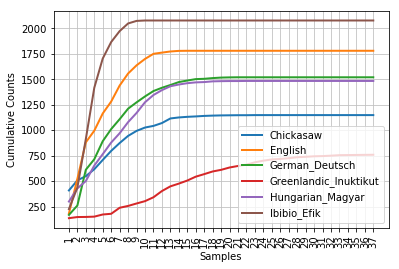

In [15]:
from nltk.corpus import udhr
langs = ['Chickasaw', 'English', 'German_Deutsch',
         'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd_langs = nltk.ConditionalFreqDist(
                 (lang, len(word))
            for lang in langs
            for word in udhr.words(lang + '-Latin1'))
cfd_langs.plot(cumulative=True)

## _Text Corpus Structure_

![TextCorpusStructure](http://whitneyontheweb.com/images/text-corpus-structure.png "Text Corpus Structure")

|Example | Description | 
|-----|-----|-----|
|```fileids()``` | the files of the corpus | 
|```fileids([categories])``` | the files of the corpus corresponding to these categories | 
|```categories()``` | the categories of the corpus | 
|```categories([fileids])``` | the categories of the corpus corresponding to these files | 
|```raw()``` | the raw content of the corpus | 
|```raw(fileids=[f1,f2,f3])``` | the raw content of the specified files | 
|```raw(categories=[c1,c2])``` | the raw content of the specified categories | 
|```words()``` | the words of the whole corpus | 
|```words(fileids=[f1,f2,f3])``` | the words of the specified fileids | 
|```words(categories=[c1,c2])``` | the words of the specified categories | 
|```sents()``` | the sentences of the whole corpus | 
|```sents(fileids=[f1,f2,f3])``` | the sentences of the specified fileids | 
|```sents(categories=[c1,c2])``` | the sentences of the specified categories | 
|```abspath(fileid)``` | the location of the given file on disk | 
|```encoding(fileid)``` | the encoding of the file (if known) | 
|```open(fileid)``` | open a stream for reading the given corpus file | 
|```root``` | if the path to the root of locally installed corpus | 
|```readme()``` | the contents of the README file of the corpus | 



## _Loading a Custom Corpus_

Individual corpora can easily be worked on in Python with the help of NLTK's ```PlaintextCorpusReader```

In [16]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/data'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()
print([w for w in sorted(list(set(wordlists.words('Pokemon.csv')))[:100]) if w.isalpha()], "...")

['Aggron', 'Azumarill', 'Beautifly', 'Bisharp', 'Bronzor', 'Chatot', 'Dedenne', 'Delibird', 'Drowzee', 'Elgyem', 'Farfetch', 'Garchomp', 'Gastrodon', 'GiratinaAltered', 'Grass', 'Gulpin', 'GyaradosMega', 'Ivysaur', 'Klink', 'Kyogre', 'Legendary', 'Marill', 'MeowsticMale', 'Metagross', 'Metang', 'Monferno', 'Mothim', 'Mr', 'Munna', 'Nidorina', 'Number', 'Omastar', 'Phanpy', 'Regice', 'Rhyhorn', 'Scizor', 'Seadra', 'Sentret', 'Slakoth', 'Smeargle', 'Snorlax', 'Solrock', 'Staryu', 'SteelixMega', 'Venomoth'] ...


## _Conditional Frequency Distributions_

A **conditional frequency distribution** is a collection of frequency distributions, each one for a different "condition"

* Frequency distributions count observable events, such as the appearance of words in a text
 - A conditional frequency distribution needs to pair each event with a condition
 - The condition will often be the category of the text

In [17]:
cfdGenreWord = nltk.ConditionalFreqDist(
                   (genre, word)
                    for genre in brown.categories()
                    for word in brown.words(categories=genre))

genre_word = [(genre, word)
               for genre in ['news', 'romance']
               for word in brown.words(categories=genre)]

print(len(genre_word))
print(genre_word[:4])
print(genre_word[-4:])
line()
cfdGenreWord = nltk.ConditionalFreqDist(genre_word)
print(cfdGenreWord)
print(cfdGenreWord.conditions())
line()
print(list(set([w for w in cfdGenreWord['romance'] if w.isalpha()]))[:24])

170576
[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]
[('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]
------------------------------------------------------------------
<ConditionalFreqDist with 2 conditions>
['news', 'romance']
------------------------------------------------------------------
['rippled', 'remove', 'swooping', 'Bancroft', 'this', 'I', 'devil', 'hell', 'featured', 'Number', 'mirror', 'deciding', 'concluded', 'Henh', 'annoyance', 'had', 'Goose', 'engine', 'millions', 'confused', 'Yes', 'Toward', 'piling', 'coal']


* Conditional Frequency Distributions are also extremely useful for plotting and tabulating distributions
* The ```generate_model()``` function contains a simple loop to generate text based on a seed word

[('1993', 33), ('1997', 31), ('2005', 30), ('1921', 24), ('1973', 23), ('1985', 21), ('2001', 20), ('1981', 16), ('2009', 15), ('1909', 12), ('1929', 12), ('1941', 12), ('1925', 11), ('1989', 11), ('1965', 10), ('1969', 10), ('1893', 9), ('1897', 9), ('1797', 8), ('1841', 7), ('1901', 7), ('1957', 7), ('1961', 7), ('1889', 6), ('1953', 6), ('1937', 5), ('1977', 5), ('1885', 4), ('1917', 4), ('1949', 4), ('1857', 3), ('1789', 2), ('1821', 2), ('1833', 2), ('1837', 2), ('1849', 2), ('1853', 2), ('1861', 2), ('1881', 2), ('1933', 2), ('1945', 2), ('1793', 1), ('1805', 1), ('1813', 1), ('1817', 1), ('1865', 1), ('1877', 1)]


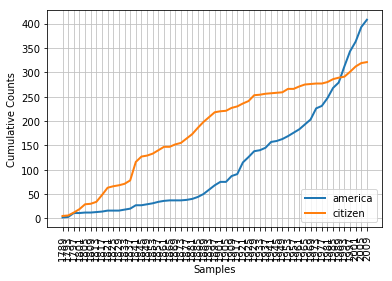

In [18]:
cfdInaugural = nltk.ConditionalFreqDist(
                   (target, fileid[:4]) 
                   for fileid in inaugural.fileids()
                   for w in inaugural.words(fileid)
                   for target in ['america', 'citizen']
               if w.lower().startswith(target))
print(cfdInaugural['america'].most_common()) #Shows frequency of the word 'america' in each inaugural address
cfdInaugural.plot(cumulative=True)

## _Generating Random Text with Bigrams_

Conditional frequency distribution can be used to create a table of bigrams (word pairs)

In [19]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()
(line)
sent = ['In', 'the', 'beginning', 'God', 'created'
      , 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))
line()
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

print(cfd['living'])
line()
generate_model(cfd, 'living')

------------------------------------------------------------------
<FreqDist with 6 samples and 16 outcomes>
------------------------------------------------------------------
living creature that he said , and the land of the land of the land 

## _Conditional Frequency Distributions Function Overview_

NLTK's Conditional Frequency Distributions: commonly-used methods and idioms for defining, accessing, and visualizing a conditional frequency distribution of counters:

|```Example``` | Description | 
|-----|-----|-----|
|```cfdist = ConditionalFreqDist(pairs)``` | create a conditional frequency distribution from a list of pairs | 
|```cfdist.conditions()``` | the conditions | 
|```cfdist[condition]``` | the frequency distribution for this condition | 
|```cfdist[condition][sample]``` | frequency for the given sample for this condition | 
|```cfdist.tabulate()``` | tabulate the conditional frequency distribution | 
|```cfdist.tabulate(samples, conditions)``` | tabulation limited to the specified samples and conditions | 
|```cfdist.plot()``` | graphical plot of the conditional frequency distribution | 
|```cfdist.plot(samples, conditions)``` | graphical plot limited to the specified samples and conditions | 
|```cfdist1 < cfdist2``` | test if samples in cfdist1 occur less frequently than in cfdist2 | 

## _Identifying Plural Forms_

Though it doesn't work for every word, plural forms of words can be (mostly) easily identified with a simple custom function

In [20]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

print(plural('Human'))     #Not correct
print(plural('Mouse'))     #Not correct
print(plural('Sandwich'))  #Correct

Humen
Mouses
Sandwiches


## _Lexical Resources_

A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions

* Usually created and enriched with the help of texts
 - A **lexical entry** consists of a **headword** (also known as a **lemma**) along with additional information such as the part of speech and the sense definition
 - Two distinct words having the same spelling are called **homonyms**
 
## _Wordlist Corpora_
 
Some corpora are simply collections of words in a list, such as the Words Corpus used by Unix spellcheckers.
 
* Such corpora can be used to identify unusual or mis-spelt words in other corpora


In [21]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

print(list(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt')))[:24], "...")

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', 'acquaintances', 'acquiesced', 'acquitted', 'acquitting', 'acted', 'actions'] ...


Another useful corpus keeps a list of **stopwords**, which are frequently occuring, such as *the*, *to*, and *also*, so they can be easiliy filtered out.

In [22]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

We can combine corpora here, and use a lexical resource to filter the content of a text corpus, or solve word puzzles.

In [23]:
def content_fraction(text):
     stopwords = nltk.corpus.stopwords.words('english')
     content = [w for w in text if w.lower() not in stopwords]
     return len(content) / len(text)
    
content_fraction(nltk.corpus.reuters.words()) #Fraction of text that are not stopwords

0.735240435097661

In [24]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6
                        and obligatory in w
                        and nltk.FreqDist(w) <= puzzle_letters]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

The **Names** Corpus lists 8,000 names split into male and female.

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny', 'Do

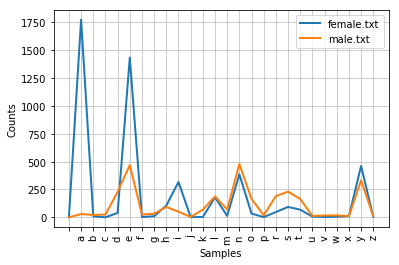

In [25]:
names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')
print([w for w in male_names if w in female_names]) # Gender Neutral Names

cfd = nltk.ConditionalFreqDist( ## Last letter bu gender
          (fileid, name[-1])
          for fileid in names.fileids()
          for name in names.words(fileid))
cfd.plot()

## _Pronunciation Dictionary_

NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers

* For each word, this lexicon provides a list of phonetic codes — distinct labels for each contrastive sound — known as **phones**
 - Phones contain digits to represent *primary stress (1)*, *secondary stress (2)*, and *no stress (0)*
* These could be applied to many used, such as identifying words that rhyme.

In [26]:
entries = nltk.corpus.cmudict.entries()
for entry in entries[32371:32379]:
    print(entry)
line()
syllable = ['N', 'IH0', 'K', 'S']
print([word for word, pron in entries if pron[-4:] == syllable]) # words that sound like 'nicks'

('discolorations', ['D', 'IH0', 'S', 'K', 'AH2', 'L', 'ER0', 'EY1', 'SH', 'AH0', 'N', 'Z'])
('discolored', ['D', 'IH0', 'S', 'K', 'AH1', 'L', 'ER0', 'D'])
('discolors', ['D', 'IH0', 'S', 'K', 'AH1', 'L', 'ER0', 'Z'])
('discombobulate', ['D', 'IH2', 'S', 'K', 'AH0', 'M', 'B', 'AO1', 'B', 'Y', 'UW0', 'L', 'EY0', 'T'])
('discombobulated', ['D', 'IH2', 'S', 'K', 'AH0', 'M', 'B', 'AO1', 'B', 'Y', 'UW0', 'L', 'EY0', 'T', 'AH0', 'D'])
('discombobulates', ['D', 'IH2', 'S', 'K', 'AH0', 'M', 'B', 'AO1', 'B', 'Y', 'UW0', 'L', 'EY0', 'T', 'S'])
('discombobulating', ['D', 'IH2', 'S', 'K', 'AH0', 'M', 'B', 'AO1', 'B', 'Y', 'UW0', 'L', 'EY0', 'T', 'IH0', 'NG'])
('discomfort', ['D', 'IH0', 'S', 'K', 'AH1', 'M', 'F', 'ER0', 'T'])
------------------------------------------------------------------
["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics

Conditional frequency distribution to help us find minimally-contrasting sets of words

* Here we find all the p-words consisting of three sounds, and group them according to their first and last sounds
* Dictionaries can also be accessed by looking up particular words, using key/value pairs

In [27]:
p3 = [(pron[0]+'-'+pron[2], word)
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


## _Comparative Wordlists_

Another example of a tabular lexicon is the comparative wordlist

* NLTK includes so-called Swadesh wordlists, lists of about 200 common words in several languages
* The languages are identified using an ISO 639 two-letter code.
* These words can be compared across languages

In [49]:
from nltk.corpus import swadesh
print(swadesh.fileids())
line()
print(swadesh.words('en'))
line()

fr2en = swadesh.entries(['fr', 'en'])    # French-English
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English

translate = dict(fr2en)
print(translate['oiseau'])
translate.update(dict(de2en))
print(translate['Vogel'])
translate.update(dict(es2en))
print(translate['ave, pájaro'])
print('bird is the word...')
line()

languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [120, 130, 150, 160]:
    print(swadesh.entries(languages)[i])

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']
------------------------------------------------------------------
['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck',

## _Toolbox/Shoebox_

Replaces the field linguist's traditional shoebox full of file cards

* Toolbox file consists of a collection of entries, where each entry is made up of one or more fields
* Most fields are optional or repeatable, which means that this kind of lexical resource cannot be treated as a table or spreadsheet

In [55]:
from nltk.corpus import toolbox
list(toolbox.entries('rotokas.dic'))[2:4]

[('kaa',
  [('ps', 'N'),
   ('pt', 'MASC'),
   ('cl', 'isi'),
   ('ge', 'cooking banana'),
   ('tkp', 'banana bilong kukim'),
   ('pt', 'itoo'),
   ('sf', 'FLORA'),
   ('dt', '12/Aug/2005'),
   ('ex', 'Taeavi iria kaa isi kovopaueva kaparapasia.'),
   ('xp', 'Taeavi i bin planim gaden banana bilong kukim tasol long paia.'),
   ('xe', 'Taeavi planted banana in order to cook it.')]),
 ('kaakaaro',
  [('ps', 'N'),
   ('pt', 'NT'),
   ('ge', 'mixture'),
   ('tkp', '???'),
   ('eng', 'mixtures'),
   ('eng', 'charm used to keep married men and women youthful and attractive'),
   ('cmt',
    'Check vowel length. Is it kaakaaro or kaakaro? Does lexeme have suffix, -aro or -ro?'),
   ('dt', '20/Nov/2006'),
   ('ex',
    'Kaakaroto ira purapaiveira aue iava opita, voeao-pa airepa oraouirara, ra va aiopaive.'),
   ('xp',
    'Kokonas ol i save wokim long ol kain samting bilong ol nupela marit, bai ol i ken kaikai.'),
   ('xe', 'Mixtures are made from coconut for newlyweds, who eat them.')])]

## _WordNet_

WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets

    A. Benz is credited with the invention of the motorcar.

    B. Benz is credited with the invention of the automobile.

In [56]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

Motorcar has just one possible meaning and it is identified as car.n.01, the first noun sense of car. 

* The entity car.n.01 is called a **synset**, or "synonym set", a collection of synonymous words (or "lemmas")
 - Each word of a synset can have several meanings, e.g., car can also signify a train carriage, a gondola, or an elevator car

In [61]:
print(wn.synset('car.n.01').lemma_names())
print(wn.lemma('car.n.01.automobile').name())
print(wn.synsets('car'))
line()
for synset in wn.synsets('car'):
    print(synset.lemma_names())
line()
print(wn.lemmas('car'))

['car', 'auto', 'automobile', 'machine', 'motorcar']
automobile
[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]
------------------------------------------------------------------
['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']
------------------------------------------------------------------
[Lemma('car.n.01.car'), Lemma('car.n.02.car'), Lemma('car.n.03.car'), Lemma('car.n.04.car'), Lemma('cable_car.n.01.car')]


WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English

* These concepts are linked together in a hierarchy. Some concepts are very general, such as Entity, State, Event
 - These are called unique beginners or root synsets
 - Others, such as gas guzzler and hatchback, are much more specific
 - Concepts that are more specific are (immediate) **hyponyms**.

In [64]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]
print(list(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()))[:25], "...")

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_car', 'estate_car', 'gas_guzzler', 'hack', 'hardtop', 'hatchback', 'heap', 'horseless_carriage', 'hot-rod'] ...


We can also navigate up the hierarchy by visiting **hypernyms**

* Some words have multiple paths, because they can be classified in more than one way

In [66]:
motorcar.hypernyms()
paths = motorcar.hypernym_paths()
print(len(paths))
print([synset.name() for synset in paths[0]])
line()
print([synset.name() for synset in paths[1]])
print(motorcar.root_hypernyms())

2
['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']
------------------------------------------------------------------
['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']
[Synset('entity.n.01')]


### _More Lexical Relations_

Hypernyms and hyponyms are called **lexical relations** because they relate one synset to another.

* These two relations navigate up and down the "is-a" hierarchy
* Another important way to navigate the WordNet network is from items to their components (**meronyms**) or to the things they are contained in (**holonyms**)
 - For example, the parts of a tree are its trunk, crown, and so on; the ```part_meronyms()```. 
 - The substance a tree is made of includes heartwood and sapwood; the ```substance_meronyms()```. 
 - A collection of trees forms a forest; the ```member_holonyms()```
* There are also relationships between verbs.
 - For example, the act of walking involves the act of stepping, so walking **entails** stepping
* Some lexical relationships hold between lemmas, e.g., **antonymy**:

In [74]:
print(wn.synset('tree.n.01').part_meronyms())
print(wn.synset('tree.n.01').substance_meronyms())
print(wn.synset('tree.n.01').member_holonyms())
line()
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())
line()
print(wn.synset('walk.v.01').entailments())
print(wn.synset('eat.v.01').entailments())
print(wn.synset('tease.v.03').entailments())
line()
print(wn.lemma('supply.n.02.supply').antonyms())
print(wn.lemma('rush.v.01.rush').antonyms())
print(wn.lemma('horizontal.a.01.horizontal').antonyms())
print(wn.lemma('staccato.r.01.staccato').antonyms())

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
[Synset('heartwood.n.01'), Synset('sapwood.n.01')]
[Synset('forest.n.01')]
------------------------------------------------------------------
batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government
------------------------------------------------------------------
[Synset('step.v.01')]
[Synset('chew.v.01'), Synset('swallow.v.01')]
[Synset('arouse.v.07'), Synset('disappoint.v.01')]
------------------------------------------------------------------
[Lemma('demand.n.02.demand')]
[Lemma('linger.v.04.linger')]
[Lemma('inclined.a.02.incli

## _Semantic Similarity_

Given a particular synset, we can traverse the WordNet network to find synsets with related meanings. 

* Knowing which words are semantically related is useful for indexing a collection of texts, so that a search for a general term like vehicle will match documents containing specific terms like limousine

In [76]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
print(right.lowest_common_hypernyms(minke))
print(right.lowest_common_hypernyms(orca))
print(right.lowest_common_hypernyms(tortoise))
print(right.lowest_common_hypernyms(novel))

[Synset('baleen_whale.n.01')]
[Synset('whale.n.02')]
[Synset('vertebrate.n.01')]
[Synset('entity.n.01')]


We know that *whale* is very specific (and *baleen* whale even more so), while *vertebrate* is more general and *entity* is completely general

* We can quantify this concept of generality by looking up the depth of each synset

In [77]:
print(wn.synset('baleen_whale.n.01').min_depth())
print(wn.synset('whale.n.02').min_depth())
print(wn.synset('vertebrate.n.01').min_depth())
print(wn.synset('entity.n.01').min_depth())

14
13
8
0
